In [749]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [750]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None):
    """
    Calcula la precisión general comparando cada celda entre el CSV de verdad y el CSV del modelo.
    """
    ground_truth = pd.read_csv(ground_truth_csv, sep=';', engine='python')
    model_answers = pd.read_csv(model_csv, sep=',', engine='python')
    
    ground_truth = ground_truth.iloc[:, start_col:end_col]
    model_answers = model_answers.iloc[:, start_col:end_col]

    total_questions = ground_truth.shape[1]
    correct_answers = (ground_truth == model_answers).astype(float)
    row_scores = correct_answers.sum(axis=1) / total_questions
    overall_accuracy = (row_scores.sum() / len(row_scores)) * 100
    
    return overall_accuracy

def generate_confusion_matrix(ground_truth_csv, model_csv, column_names):
    """
    Genera y muestra matrices de confusión para múltiples columnas categóricas.

    Parámetros:
        - ground_truth_csv: Ruta del archivo CSV con los valores reales.
        - model_csv: Ruta del archivo CSV con las predicciones del modelo.
        - column_names: Lista de nombres de columnas a analizar.
    """
    # Cargar los archivos
    ground_truth = pd.read_csv(ground_truth_csv, sep=';', engine='python')
    model_answers = pd.read_csv(model_csv, sep=',', engine='python')

    for column_name in column_names:
        # Verificar si la columna existe en ambos archivos
        if column_name not in ground_truth.columns or column_name not in model_answers.columns:
            print(f"⚠️ La columna '{column_name}' no existe en uno de los archivos.")
            continue  

        # Extraer etiquetas reales y predichas, eliminando NaN
        true_labels = ground_truth[column_name].dropna()
        predicted_labels = model_answers[column_name].dropna()

        # Si no hay datos después de eliminar NaN, saltar la columna
        if true_labels.empty or predicted_labels.empty:
            print(f"⚠️ La columna '{column_name}' está vacía después de eliminar NaN.")
            continue  

        # Obtener todas las clases únicas
        labels = sorted(set(true_labels).union(set(predicted_labels)))
        cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

        # Visualizar matriz de confusión
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.xlabel("Predicho (Modelo)")
        plt.ylabel("Real (Ground Truth)")
        plt.title(f"Matriz de Confusión - {column_name}")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()


def calculate_error_frequency_all_columns(ground_truth_csv, model_csv):
    """
    Calcula la frecuencia de errores para TODAS las columnas categóricas del CSV
    y genera un gráfico de barras mostrando el número de errores por columna.
    Mantiene el orden original del header.
    """
    ground_truth = pd.read_csv(ground_truth_csv, sep=';', engine='python')
    model_answers = pd.read_csv(model_csv, sep=',', engine='python')

    # Asegurar que tienen las mismas columnas y respetar el orden del header
    common_columns = [col for col in ground_truth.columns if col in model_answers.columns]
    
    error_counts = []

    for column_name in common_columns:
        true_labels = ground_truth[column_name]
        predicted_labels = model_answers[column_name]

        errors = (true_labels != predicted_labels).sum()  # Contar diferencias
        error_counts.append((column_name, errors))  # Guardar en lista manteniendo el orden
    
    # Convertir en DataFrame respetando el orden del header
    error_df = pd.DataFrame(error_counts, columns=["Columna", "Errores"])

    # Graficar en el orden correcto
    error_df_filtered = error_df.iloc[3:]  # Esto elimina las 3 primeras filas

    sns.barplot(x=error_df_filtered["Columna"], y=error_df_filtered["Errores"], palette="Reds_r", order=error_df_filtered["Columna"])
    
    plt.xlabel("Columnas")
    plt.ylabel("Número de Errores")
    plt.title("Frecuencia de Errores por Columna")
    plt.xticks(rotation=90)
    
    plt.show()

In [751]:
def lista_a_diccionario(lista):
    diccionario = {f"{i+1}": valor for i, valor in enumerate(lista)}
    return diccionario

### 5xl

In [752]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip2_t5_pretrain_flant5xl_3187.csv'

              General  Sujetos  Actividades  Contexto
Accuracy 5xl     87.9     99.7        97.92     79.44


C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\3151609279.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracy5xl.columns, y=df_accuracy5xl.loc["Accuracy 5xl"], palette="Blues_r")


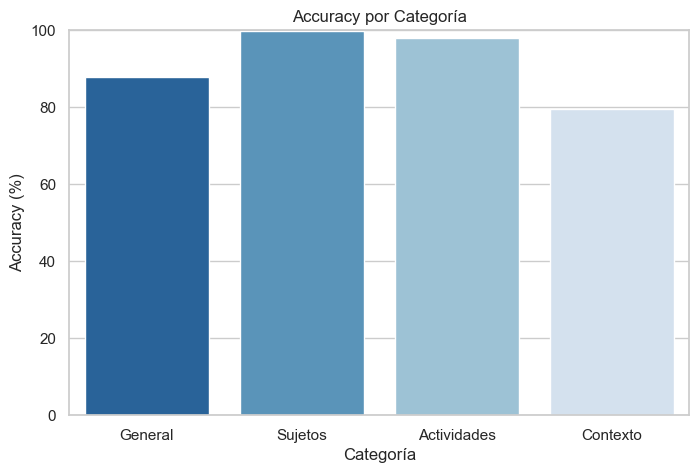

In [753]:
accuracy_data = {
    "General": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None),2)],
    "Sujetos": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10),2)],
    "Actividades": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12),2)],
    "Contexto": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None),2)
    ]
}
df_accuracy5xl = pd.DataFrame(accuracy_data, index=["Accuracy 5xl"])
print(df_accuracy5xl)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_accuracy5xl.columns, y=df_accuracy5xl.loc["Accuracy 5xl"], palette="Blues_r")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("Categoría")
plt.title("Accuracy por Categoría")
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\2142551368.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_df_filtered["Columna"], y=error_df_filtered["Errores"], palette="Reds_r", order=error_df_filtered["Columna"])


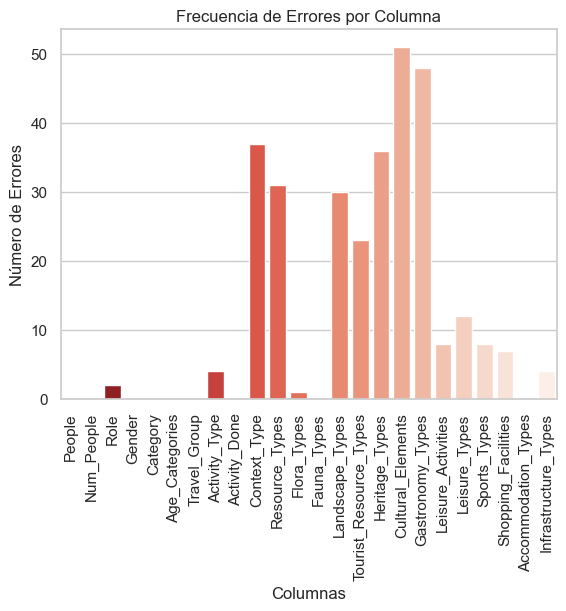

In [754]:
calculate_error_frequency_all_columns(ground_truth_csv, model_csv)

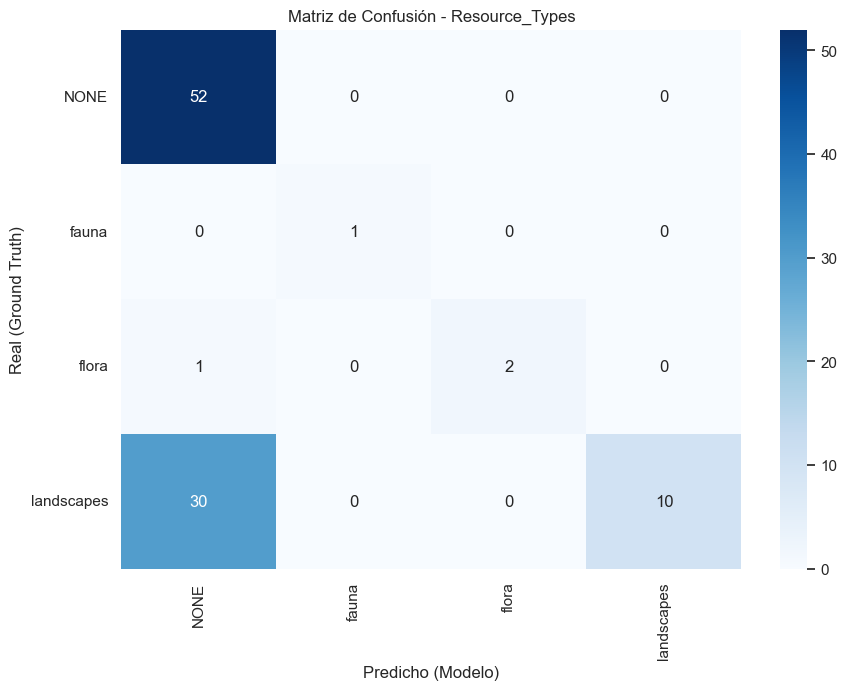

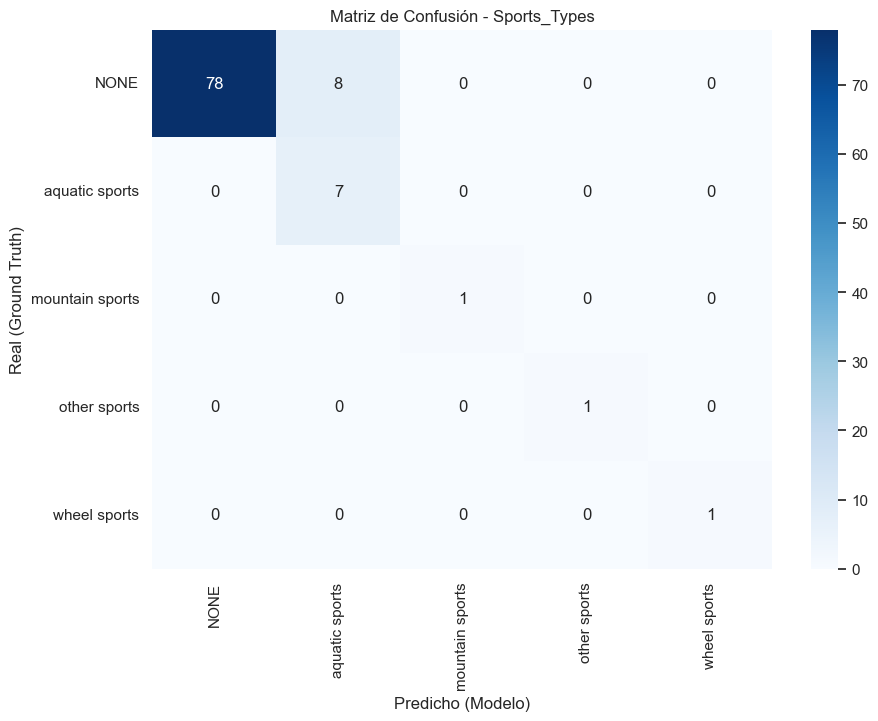

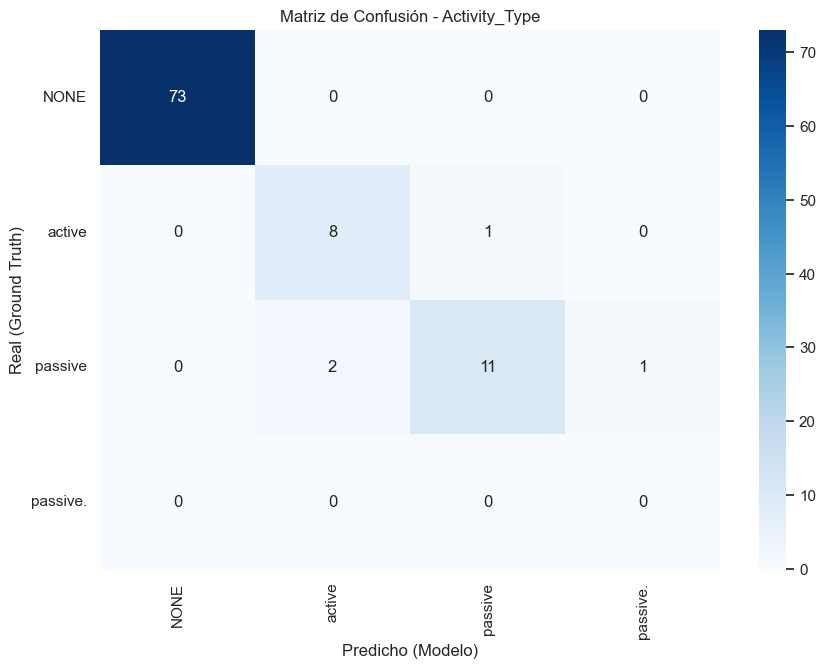

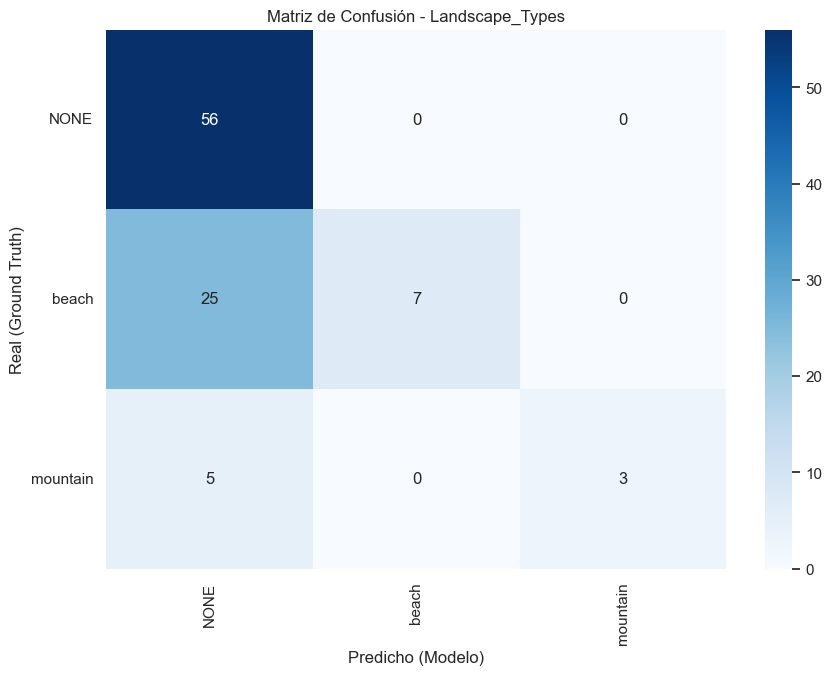

In [755]:
generate_confusion_matrix(ground_truth_csv, model_csv, 
                          ["Resource_Types", "Sports_Types", "Activity_Type", "Landscape_Types"])

### Coco OPT 27b

In [756]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip2_opt_caption_coco_opt2.7b_3337.csv'

                      General  Sujetos  Actividades  Contexto
Accuracy cocoOPT2.7b    57.61     11.9         5.21     80.28


C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\3636889431.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracyOpt27b.columns, y=df_accuracyOpt27b.loc["Accuracy cocoOPT2.7b"], palette="Blues_r")


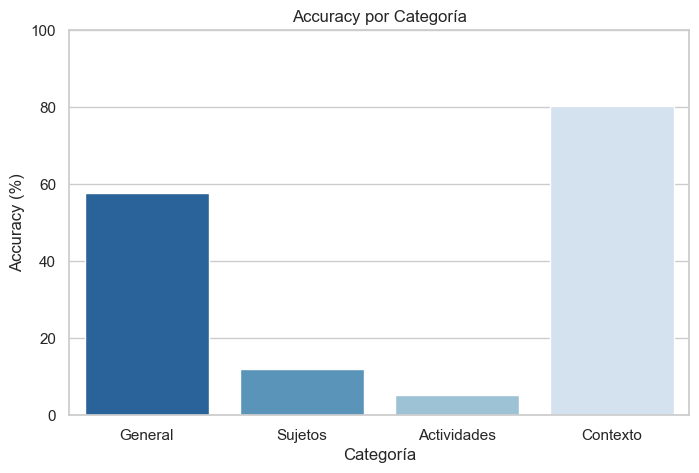

In [757]:
accuracy_data = {
    "General": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None),2)],
    "Sujetos": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10),2)],
    "Actividades": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12),2)],
    "Contexto": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None),2)
    ]
}
df_accuracyOpt27b = pd.DataFrame(accuracy_data, index=["Accuracy cocoOPT2.7b"])
print(df_accuracyOpt27b)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_accuracyOpt27b.columns, y=df_accuracyOpt27b.loc["Accuracy cocoOPT2.7b"], palette="Blues_r")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("Categoría")
plt.title("Accuracy por Categoría")
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\2142551368.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_df_filtered["Columna"], y=error_df_filtered["Errores"], palette="Reds_r", order=error_df_filtered["Columna"])


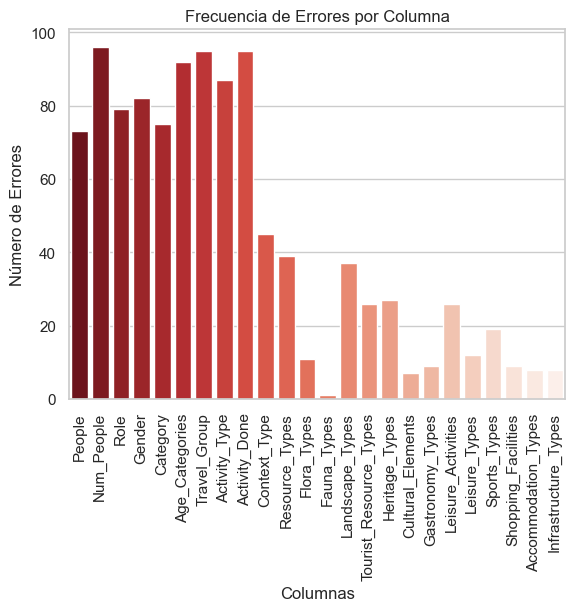

In [758]:
calculate_error_frequency_all_columns(ground_truth_csv, model_csv)

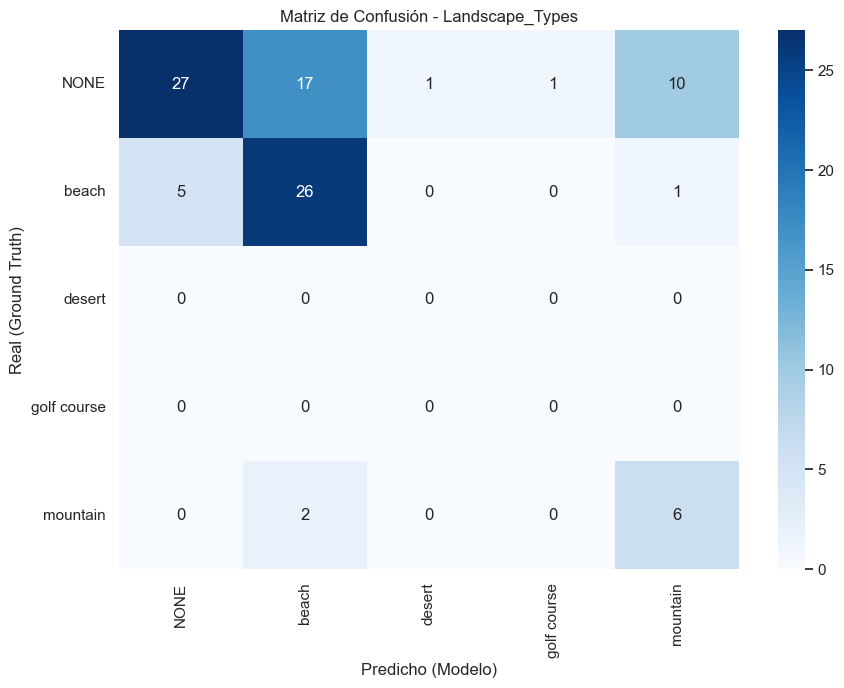

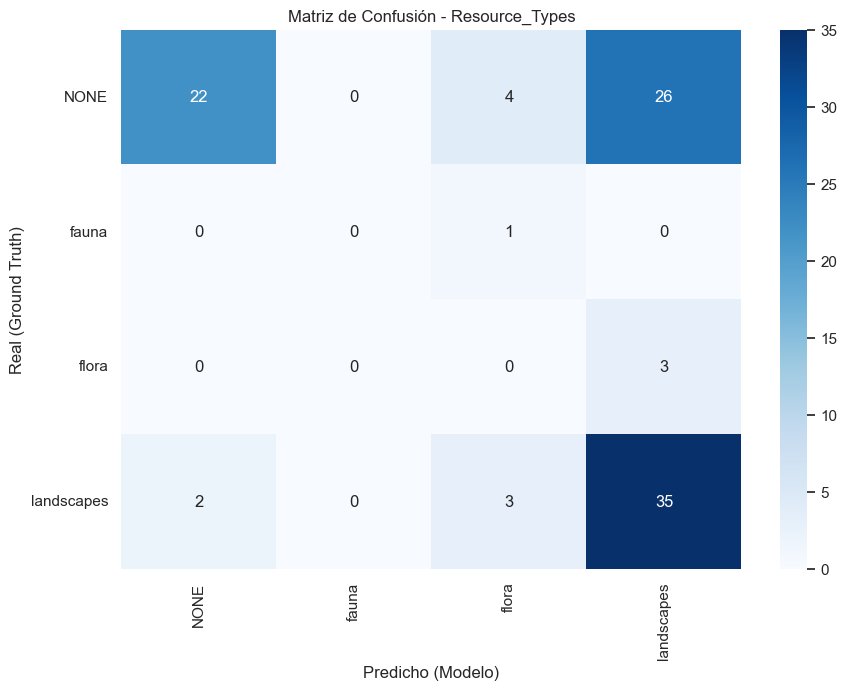

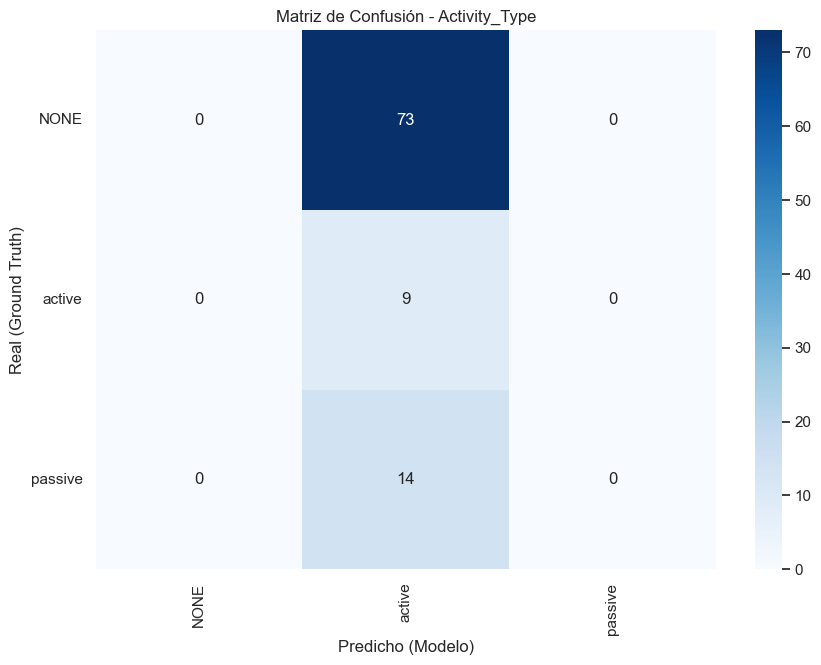

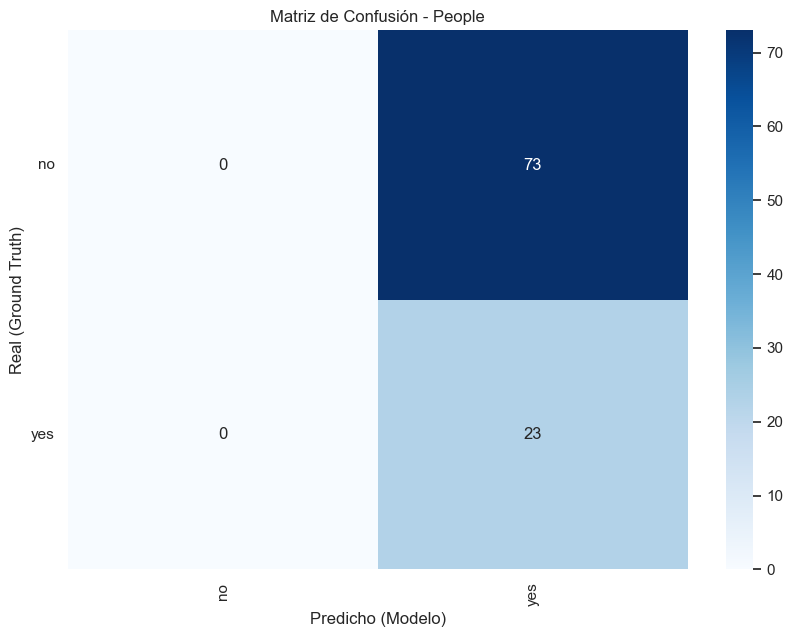

In [759]:
generate_confusion_matrix(ground_truth_csv, model_csv, 
                          ["Landscape_Types", "Resource_Types", "Activity_Type", "People"])

### Vqav2

In [760]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip_vqa_vqav2_9444.csv'

                General  Sujetos  Actividades  Contexto
Accuracy Vqav2    18.23    30.36         27.6      0.42


C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\4011451401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracyVqav2.columns, y=df_accuracyVqav2.loc["Accuracy Vqav2"], palette="Blues_r")


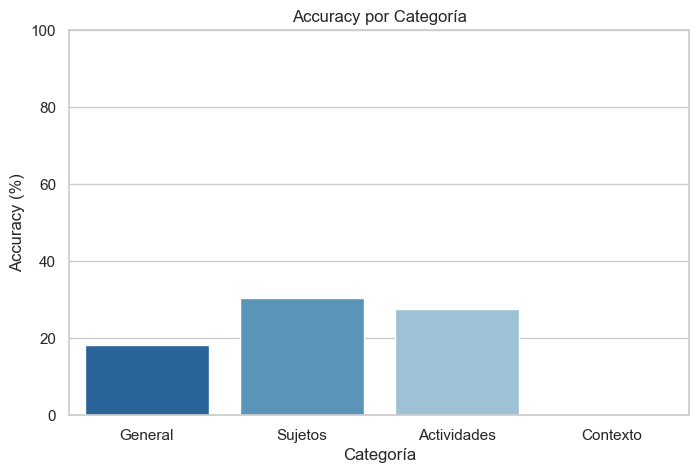

In [761]:
accuracy_data = {
    "General": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None),2)],
    "Sujetos": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10),2)],
    "Actividades": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12),2)],
    "Contexto": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None),2)
    ]
}
df_accuracyVqav2 = pd.DataFrame(accuracy_data, index=["Accuracy Vqav2"])
print(df_accuracyVqav2)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_accuracyVqav2.columns, y=df_accuracyVqav2.loc["Accuracy Vqav2"], palette="Blues_r")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("Categoría")
plt.title("Accuracy por Categoría")
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\2142551368.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_df_filtered["Columna"], y=error_df_filtered["Errores"], palette="Reds_r", order=error_df_filtered["Columna"])


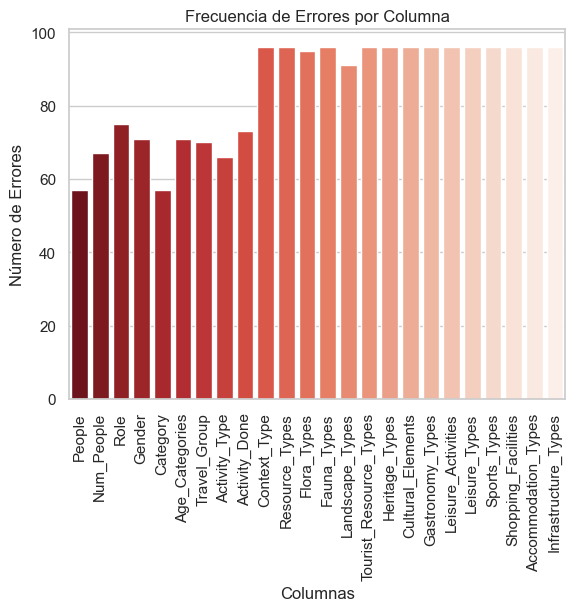

In [762]:
calculate_error_frequency_all_columns(ground_truth_csv, model_csv)

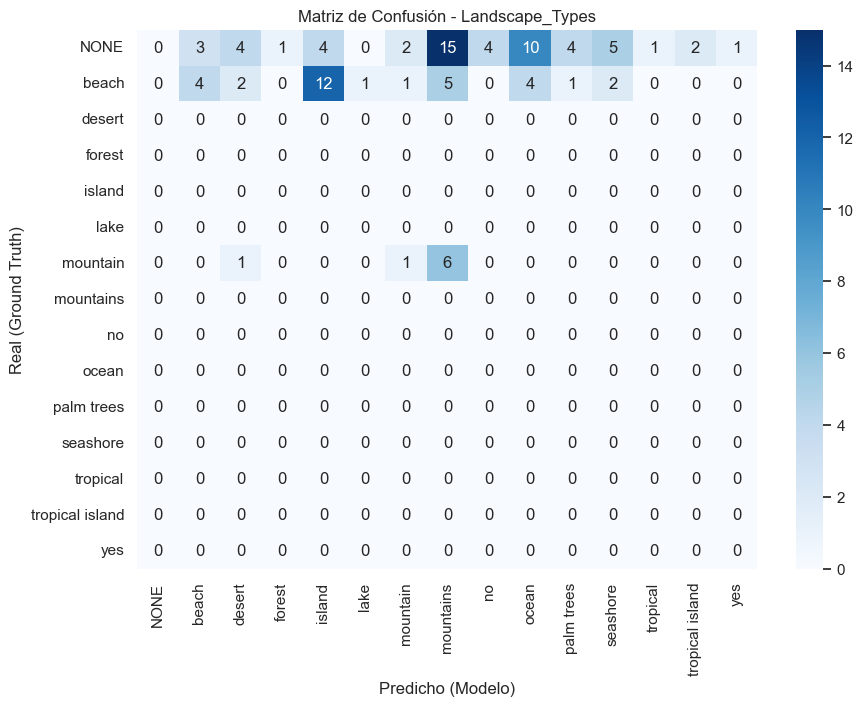

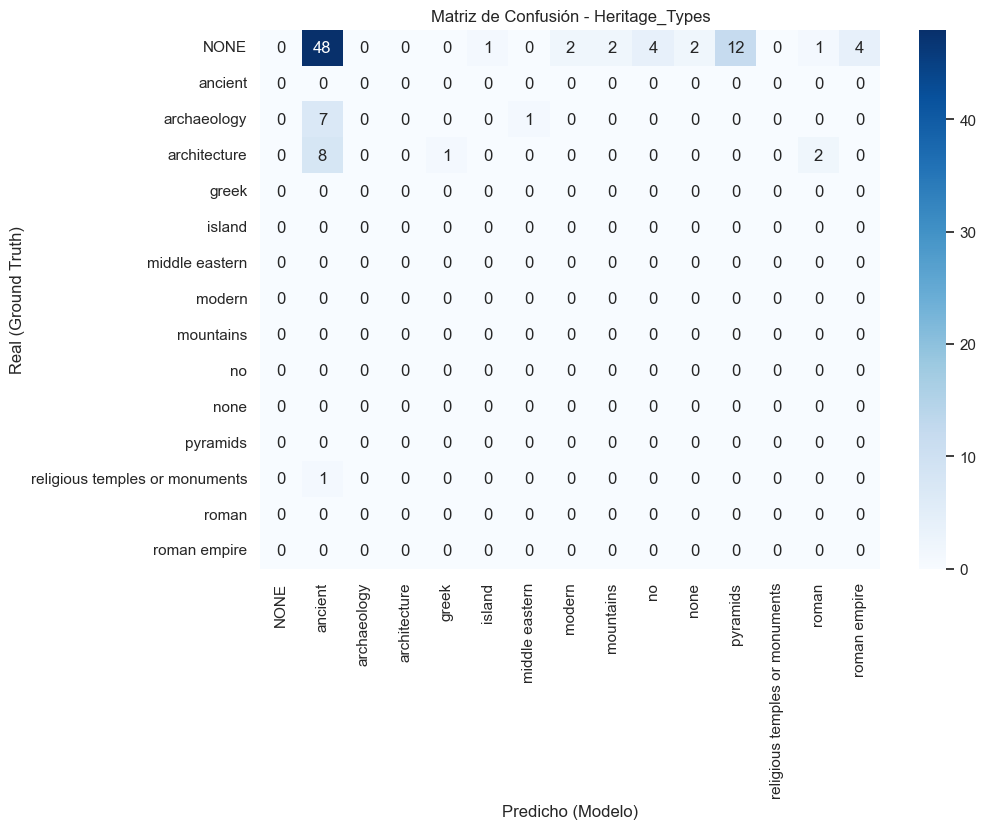

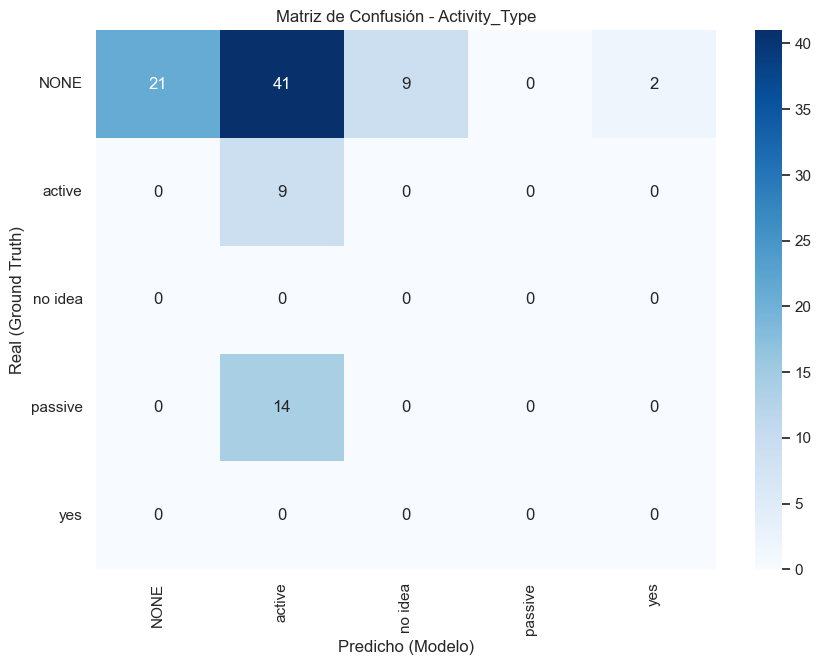

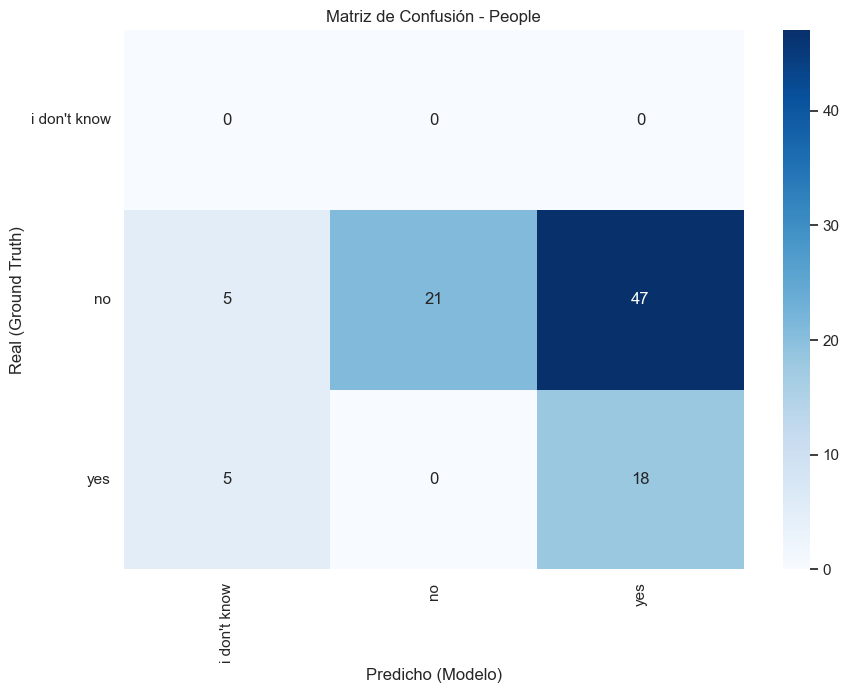

In [763]:
generate_confusion_matrix(ground_truth_csv, model_csv, 
                          ["Landscape_Types", "Heritage_Types", "Activity_Type", "People"])

### Vqa Base

In [764]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/pnp_vqa_base_6558.csv'

                   General  Sujetos  Actividades  Contexto
Accuracy Vqa Base    75.64    67.86        66.67     77.22


C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\547190920.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracyVqaBase.columns, y=df_accuracyVqaBase.loc["Accuracy Vqa Base"], palette="Blues_r")


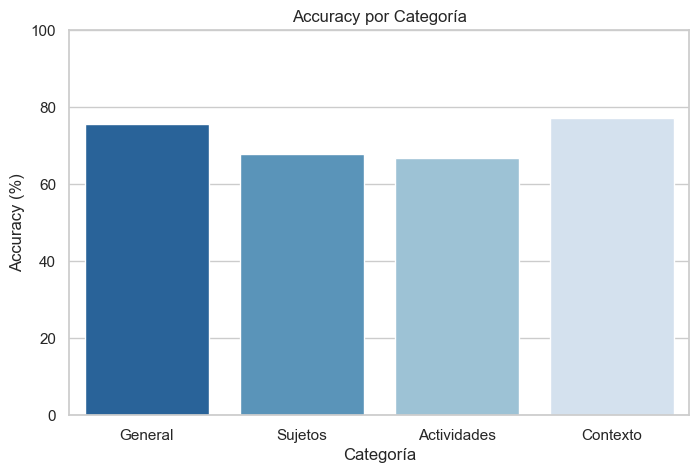

In [765]:
accuracy_data = {
    "General": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None),2)],
    "Sujetos": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10),2)],
    "Actividades": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12),2)],
    "Contexto": [
        round(calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None),2)
    ]
}
df_accuracyVqaBase = pd.DataFrame(accuracy_data, index=["Accuracy Vqa Base"])
print(df_accuracyVqaBase)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_accuracyVqaBase.columns, y=df_accuracyVqaBase.loc["Accuracy Vqa Base"], palette="Blues_r")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("Categoría")
plt.title("Accuracy por Categoría")
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_19164\2142551368.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_df_filtered["Columna"], y=error_df_filtered["Errores"], palette="Reds_r", order=error_df_filtered["Columna"])


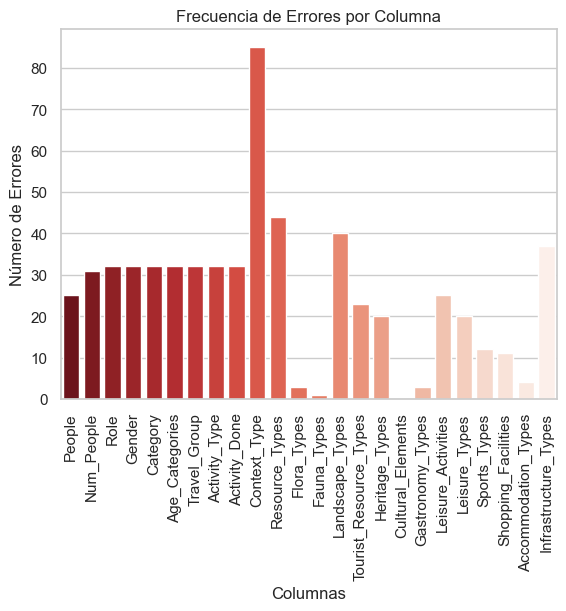

In [766]:
calculate_error_frequency_all_columns(ground_truth_csv, model_csv)

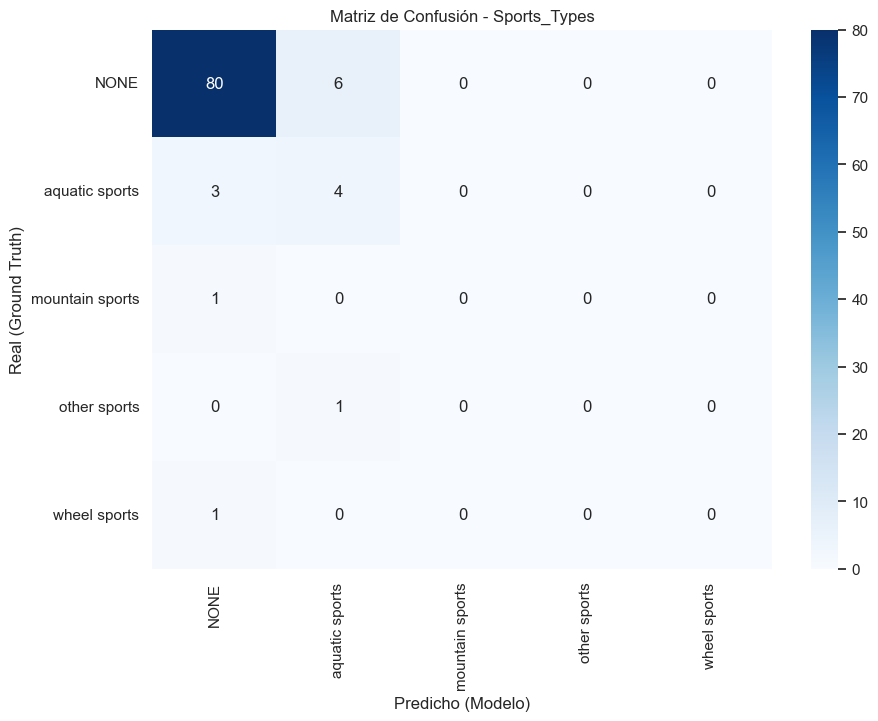

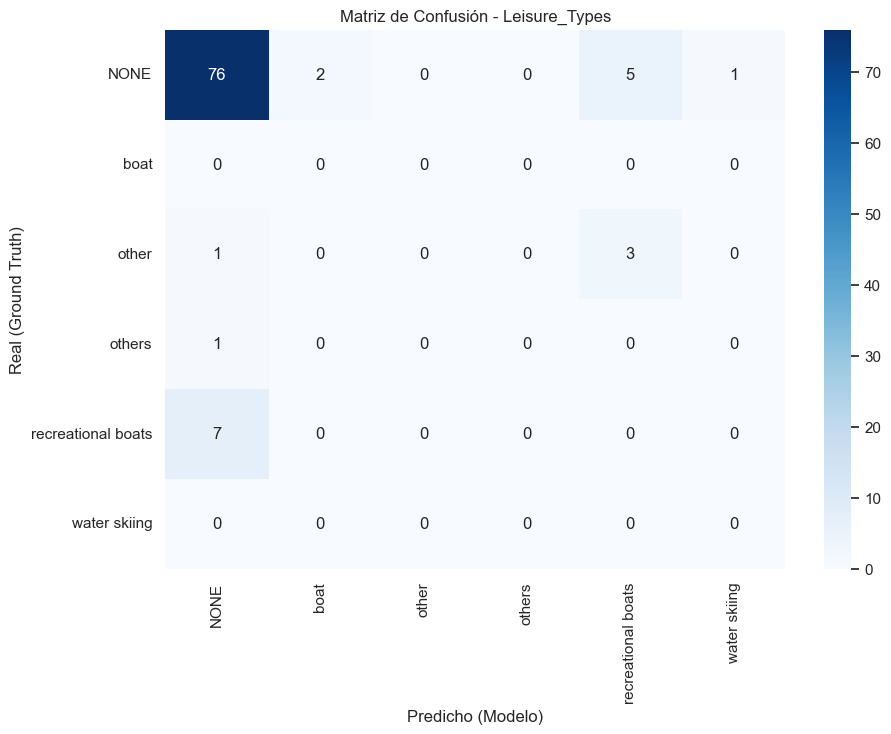

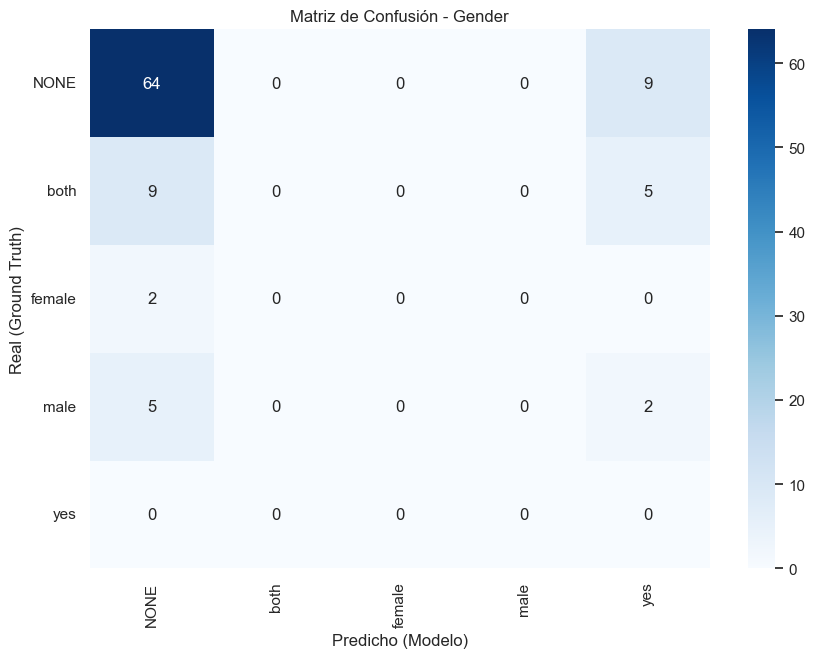

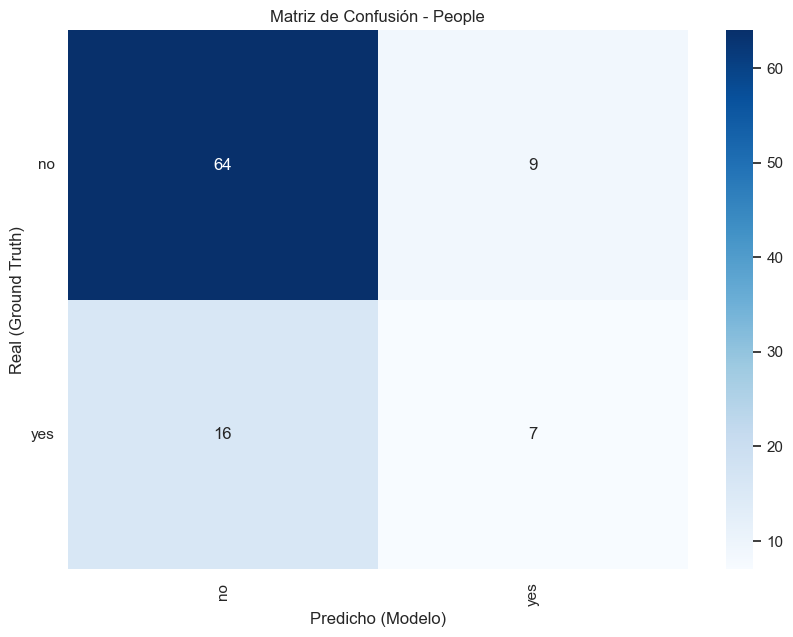

In [767]:
generate_confusion_matrix(ground_truth_csv, model_csv, 
                          ["Sports_Types", "Leisure_Types", "Gender", "People"])